In [5]:
!git clone -b research https://github.com/phungbminh/graph-data-science.git

Cloning into 'graph-data-science'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 61 (delta 16), reused 54 (delta 9), pack-reused 0 (from 0)
Receiving objects: 100% (61/61), 1.23 MiB | 8.70 MiB/s, done.
Resolving deltas: 100% (16/16), done.


In [6]:
import os
os.chdir("/kaggle/working/graph-data-science")

In [7]:
import torch  

cuda_available = torch.cuda.is_available()  
cuda_version = torch.version.cuda

print(f"CUDA Available: {cuda_available}")  
print(f"CUDA Version: {cuda_version}")

CUDA Available: True
CUDA Version: 12.3


In [9]:
!conda install -c rapidsai -c conda-forge -c nvidia nx-cugraph cuda-version=12.3 -y

Retrieving notices: ...working... done
Channels:
 - rapidsai
 - conda-forge
 - nvidia
 - nodefaults
 - defaults
 - pytorch
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - cuda-version=12.3
    - nx-cugraph


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-24.9.1               |  py310hff52083_0         894 KB  conda-forge
    libcugraph-24.08.00        |cuda12_240808_gfc880db0c_0        1.08 GB  rapidsai
    libcugraphops-24.08.01     |cuda12_240808_gefdc8f56_0        91.2 MB  rapidsai
    networkx-3.4.1             |     pyhd8ed1ab_0         1.1 MB  conda-forge
    nx-cugraph-24.08.00        |          py310_0         156 KB  rapidsai
    pylibcugraph-24.08.00      |cuda12_py310_240808_gfc880db0c_0         795 KB  rapidsai
    ucx-proc-1.0.0             |              gpu           9 KB  rapidsai


In [10]:
!conda install -c rapidsai -c conda-forge -c nvidia cugraph cuda-version=12.3 -y

Channels:
 - rapidsai
 - conda-forge
 - nvidia
 - nodefaults
 - defaults
 - pytorch
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - cuda-version=12.3
    - cugraph


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cugraph-24.08.00           |cuda12_py310_240808_gfc880db0c_0         2.2 MB  rapidsai
    ------------------------------------------------------------
                                           Total:         2.2 MB

The following NEW packages will be INSTALLED:

  cugraph            rapidsai/linux-64::cugraph-24.08.00-cuda12_py310_240808_gfc880db0c_0 



                                                                                
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [11]:
!pip install ogb
!pip install torch_geometric
#!pip install graphistry
!pip install scikit-network

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 52.3 MB/s eta 0:00:0000:0100:01


#### !pip install ogb
!pip install torch_geometric
#!pip install graphistry
!pip install scikit-network

In [12]:
import utils.g_biokg as gbg

In [13]:
G = gbg.createBioKG()

Downloaded 0.90 GB: 100%|██████████| 920/920 [14:09<00:00,  1.08it/s]


Extracting /kaggle/working/graph-data-science/dataset/biokg.zip
Loading necessary files...
This might take a while.
Processing graphs...


100%|██████████| 1/1 [00:00<00:00, 3536.51it/s]

Saving...


In [14]:
import utils.biokg2df as dfbkg
biokg_edge_list = dfbkg.load_edge_df();
biokg_edge_list

biokg_node_list = dfbkg.load_node_df(biokg_edge_list);
import pandas as pd
# dictionary of lists
df = pd.DataFrame(biokg_edge_list)
df.to_csv('edge_index.csv')

In [ ]:
import graphistry
import pandas as pd
import matplotlib
from matplotlib import cm


# Generate a list of colors from a colormap  
colormap = matplotlib.colormaps['coolwarm']

colors = [colormap(i) for i in range(colormap.N)]  
color_hex = [cm.colors.to_hex(c) for c in colors]  # Convert to hex colors  
#4762678
list_t = biokg_edge_list.head(500000)
# Bind
g1 = graphistry.edges(list_t, 'Origin', 'Destination')
# Override styling defaults
g1_styled = g1.encode_edge_color('EdgeType',color_hex ,as_continuous=True)

#g1_styled = g1.encode_edge_color('weight', palette=color_hex, as_continuous=True)  
# Connect: Free GPU accounts and self-hosting @ graphistry.com/get-started
graphistry.register(api=3, username='phungbm.work', password='Bph$ng@2@598')
# Upload for GPU server visualization session
#g1_styled.plot()
g1_styled.plot()

In [ ]:
import networkx as nx
import nx_cugraph as nxcg

nxcg_G = nxcg.from_networkx(G)             # conversion happens once here
nx.betweenness_centrality(nxcg_G, k=1000)  # nxcg Graph type causes cugraph backend
#draw_graph(nxcg_G, show_names=True, node_size=2, edge_width=0.2)


In [12]:
# Histogram lai danh sách canh va nút
# The nao la EDA
# k_core la gi
# (Neo4j)
# Danh gia bắt dinh, ve biểu bao
# Phan phoi bac đỉnh
# Dùng gen4j nx-cu
# Tính số power law (độ phức tạp)
# —thanh Phan liên thong
# Moi quan the bao nhieu - o y nghia tuong tac gì không
# Trung binh đường đi từ vi vG

In [18]:
import networkx as nx
import nx_cugraph as nxcg

nxcg_G = nxcg.from_networkx(G);

In [ ]:
import matplotlib.pyplot as plt
import cudf  
import cugraph 

edges_list = list(G.edges())  
edges_df = cudf.DataFrame(edges_list, columns=['src', 'dst'])  

G_cu = cugraph.Graph()  
G_cu.from_cudf_edgelist(edges_df, source='src', destination='dst')  
  
betweenness_centrality = cugraph.betweenness_centrality(G_cu)  
print(betweenness_centrality.head())

betwcent_df = pd.DataFrame(betweenness_centrality.to_pandas() )
betwcent_df.columns = ['betweenness_centrality']
betwcent_df.sort_values('betweenness_centrality', inplace=True, ascending=False)
title = 'Betweenness Centrality'
_ = betwcent_df.plot.barh(title=titler)
plt.gca().invert_yaxis()

In [15]:
biokg_edge_list

#biokg_node_list

,Origin,Destination,OriginType,DestinationType,EdgeType
0,disease_1718,protein_3207,disease,protein,disease-protein
1,disease_4903,protein_13662,disease,protein,disease-protein
2,disease_5480,protein_15999,disease,protein,disease-protein
3,disease_3148,protein_7247,disease,protein,disease-protein
4,disease_10300,protein_16202,disease,protein,disease-protein
...,...,...,...,...,...
352541,protein_13866,protein_11683,protein,protein,protein-protein_reaction
352542,protein_10825,protein_657,protein,protein,protein-protein_reaction
352543,protein_12658,protein_11999,protein,protein,protein-protein_reaction
352544,protein_12028,protein_2482,protein,protein,protein-protein_reaction


In [ ]:
edge_ = df[['EdgeType']]

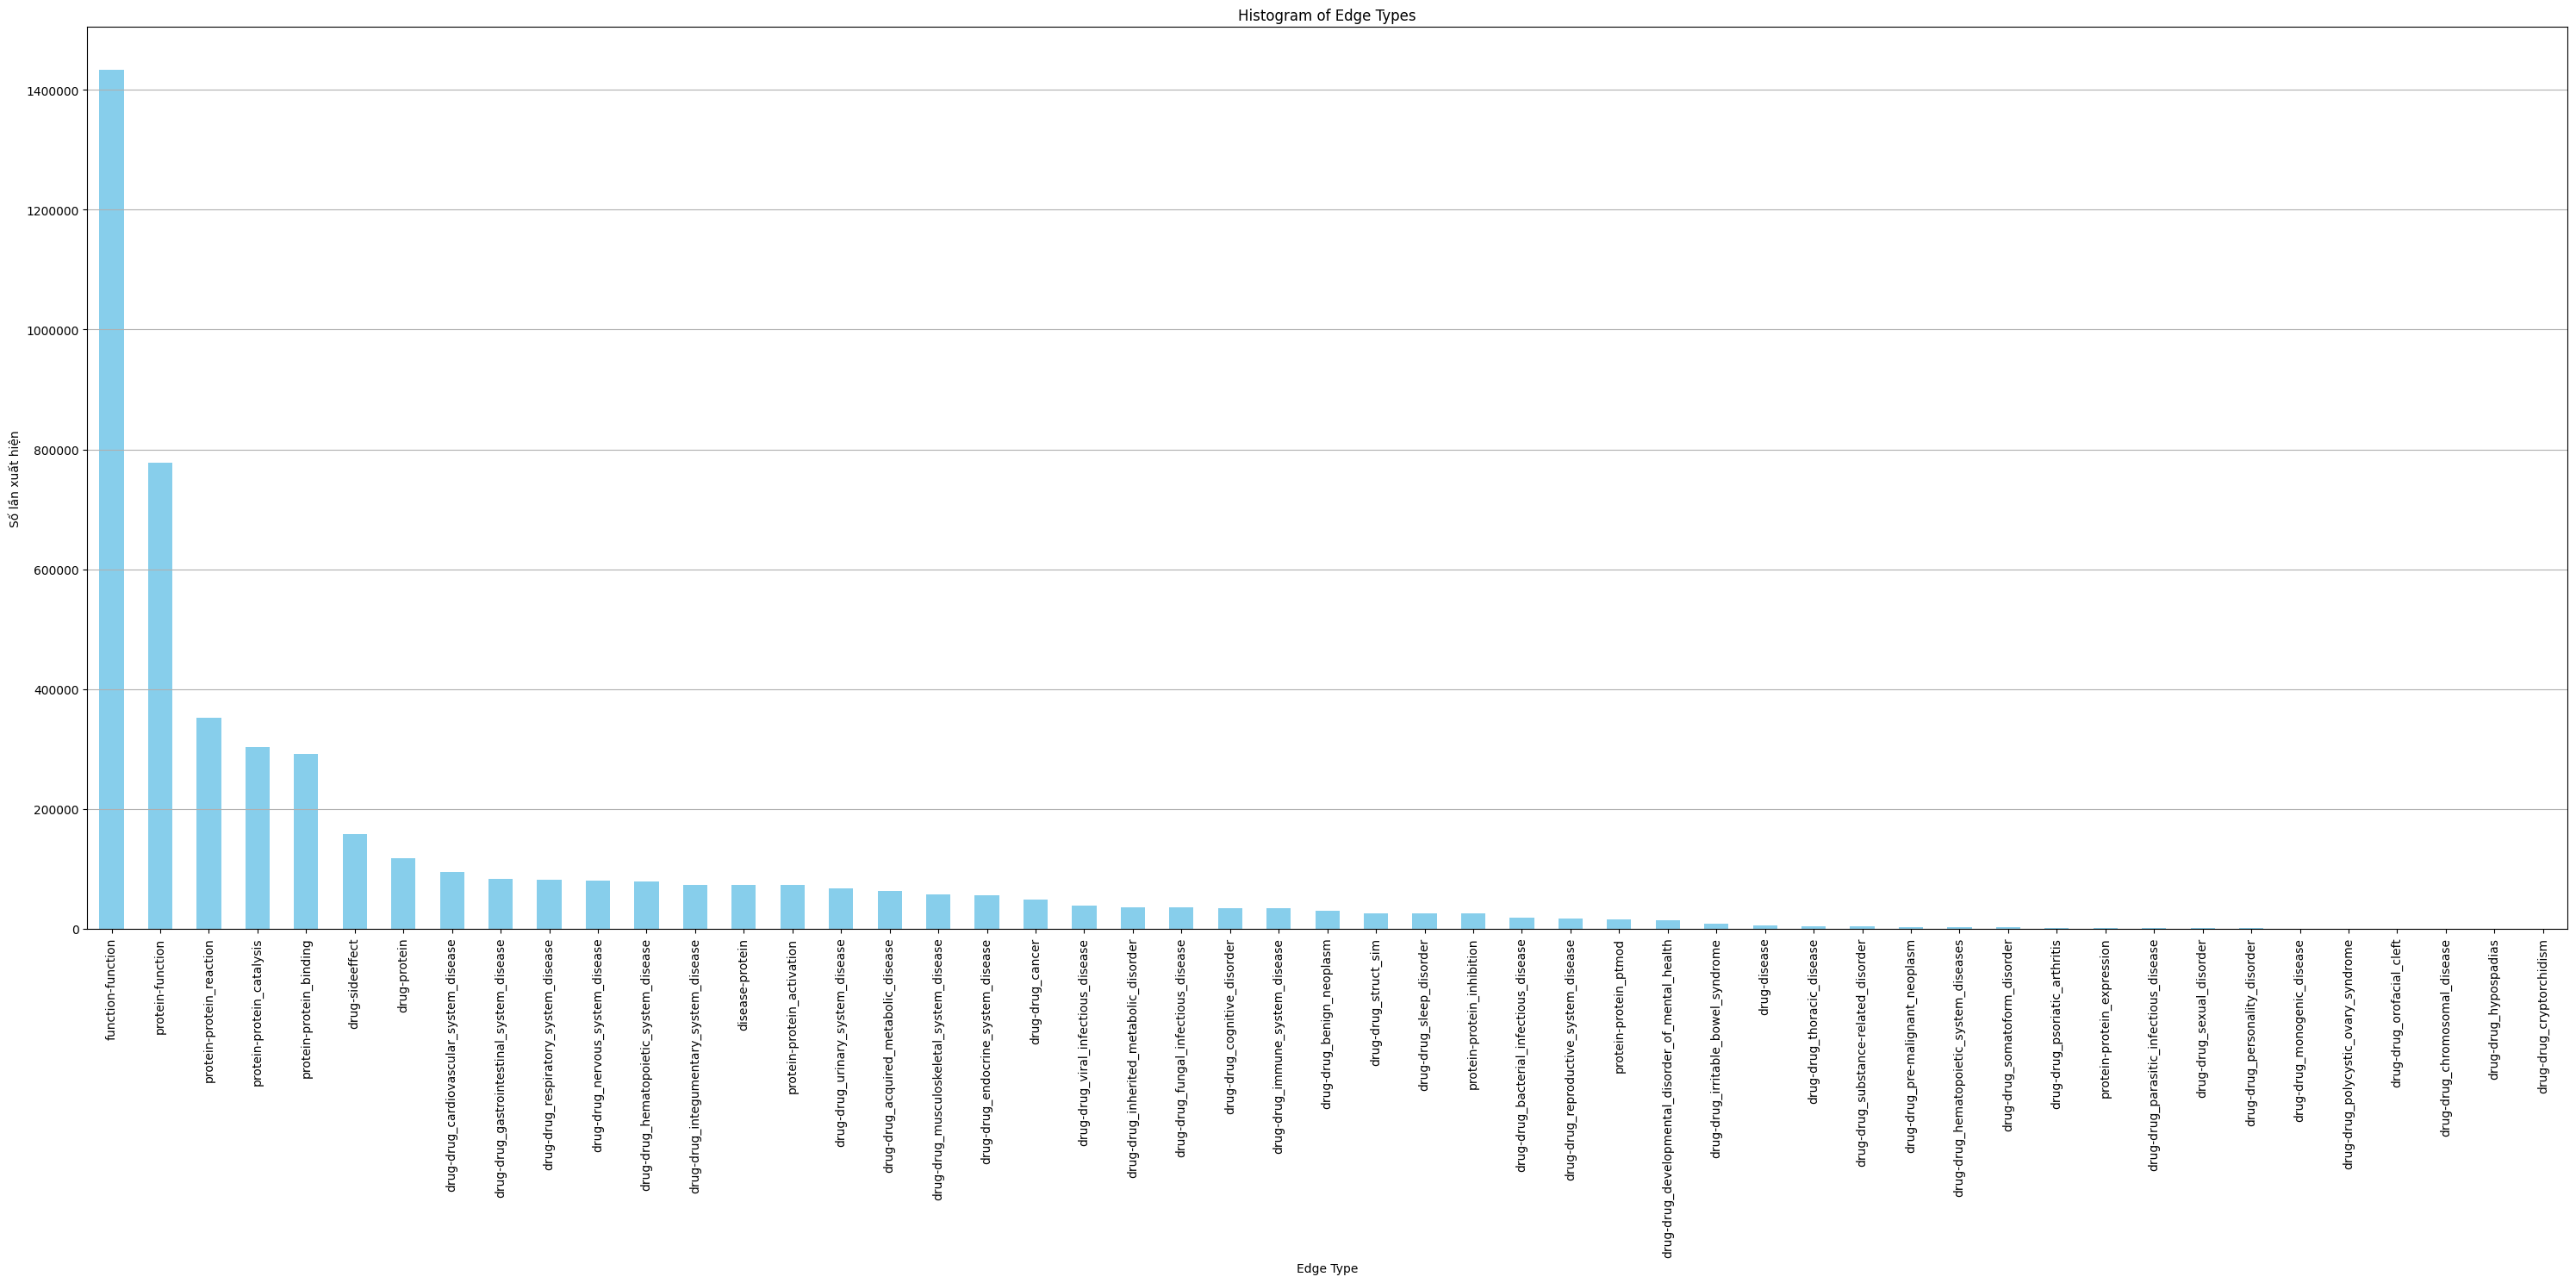

In [17]:
import pandas as pd  
import matplotlib.pyplot as plt  
from matplotlib.ticker import FuncFormatter  


edge_counts = biokg_edge_list['EdgeType'].value_counts()  
# Vẽ histogram  
plt.figure(figsize=(30, 15))  
edge_counts.plot(kind='bar', color='skyblue')  
plt.title('Histogram of Edge Types')  
plt.xlabel('Edge Type')  
plt.ylabel('Số lần xuất hiện')  
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))  
plt.xticks(rotation=90)  
plt.grid(axis='y')  

# Hiển thị biểu đồ  
plt.tight_layout()  
plt.show()  

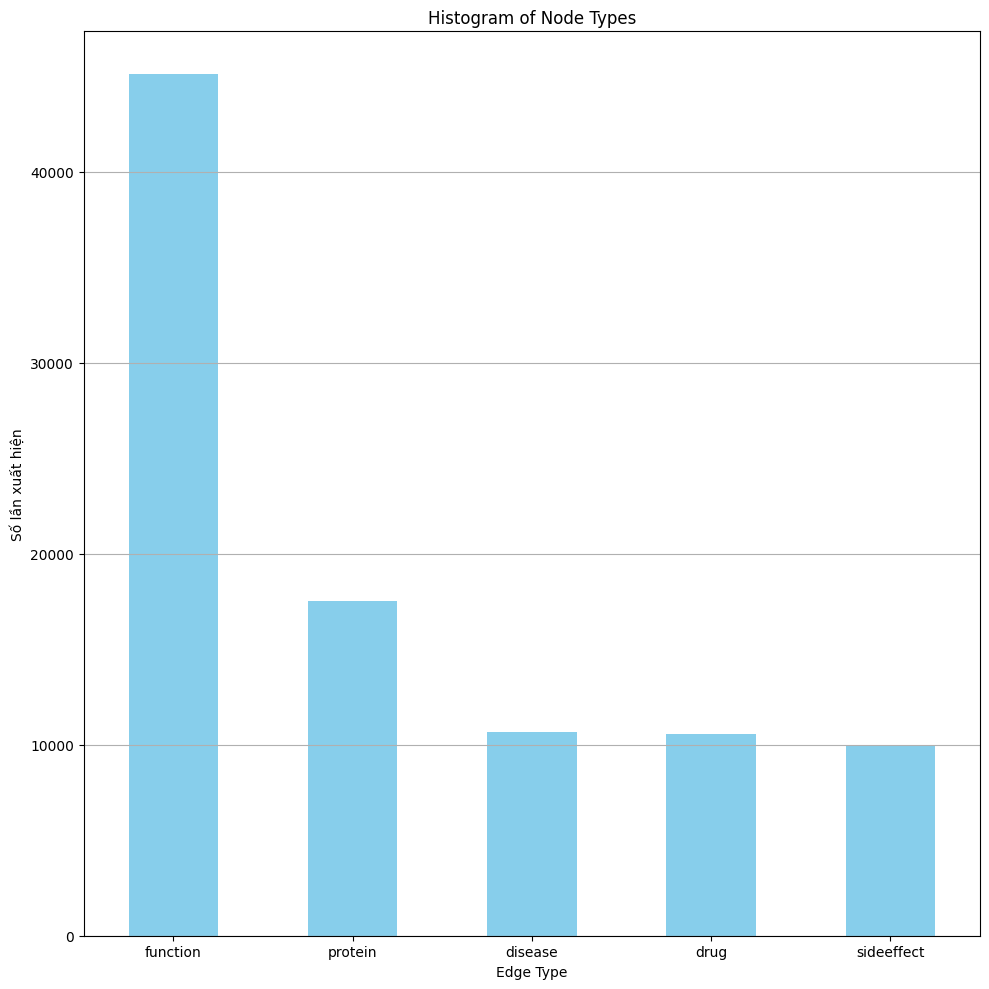

In [18]:
edge_counts = biokg_node_list['NodeType'].value_counts()  
# Vẽ histogram  
plt.figure(figsize=(10, 10))  
edge_counts.plot(kind='bar', color='skyblue')  
plt.title('Histogram of Node Types')  
plt.xlabel('Edge Type')  
plt.ylabel('Số lần xuất hiện')  
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))  
plt.xticks(rotation=0)  
plt.grid(axis='y')  

# Hiển thị biểu đồ  
plt.tight_layout()  
plt.show()

In [19]:
edge_type_counts = biokg_edge_list['EdgeType'].value_counts().reset_index()  
edge_type_counts.columns = ['EdgeType', 'Count']  
edge_type_counts

,EdgeType,Count
0,function-function,1433230
1,protein-function,777577
2,protein-protein_reaction,352546
3,protein-protein_catalysis,303434
4,protein-protein_binding,292254
5,drug-sideeffect,157479
6,drug-protein,117930
7,drug-drug_cardiovascular_system_disease,94842
8,drug-drug_gastrointestinal_system_disease,83210
9,drug-drug_respiratory_system_disease,82168


/opt/conda/lib/python3.10/site-packages/cugraph/structure/symmetrize.py:92: FutureWarning: Multi is deprecated and the removal of multi edges will no longer be supported from 'symmetrize'. Multi edges will be removed upon creation of graph instance.
  warnings.warn(


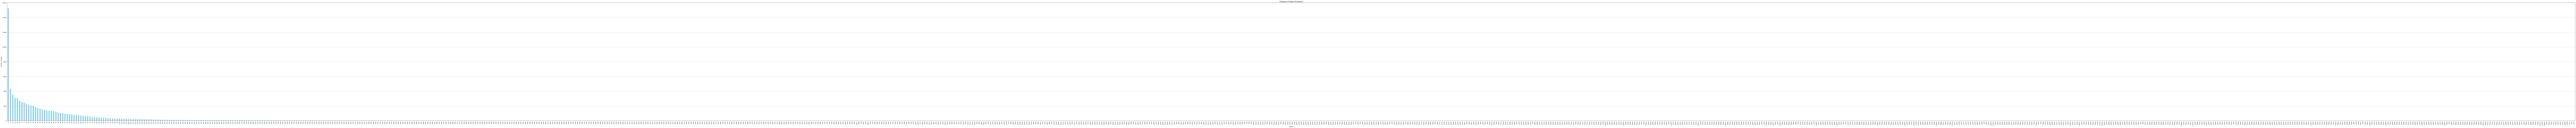

<Figure size 640x480 with 0 Axes>

In [68]:
import cudf  
import cugraph  
import numpy as np  
import matplotlib.pyplot as plt  


edges_list = list(G.edges())  
edges_df = cudf.DataFrame(edges_list, columns=['src', 'dst'])  

G_cu = cugraph.Graph()  
G_cu.from_cudf_edgelist(edges_df, source='src', destination='dst')  
 
degree_series = G_cu.degree()
  
degree_counts = degree_series['degree'].value_counts()

plt.figure(figsize=(300, 15))  
degree_counts.to_pandas().plot(kind='bar', color='skyblue')  
plt.title('Histogram of Degree distribution')  
plt.xlabel('Degree')  
plt.ylabel('Number of Node')  
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))  
plt.xticks(rotation=90)  
plt.grid(axis='y')
plt.tight_layout()
plt.show()
# save plot
plt.savefig('/kaggle/working/graph-data-science/degree_distribution.png', bbox_inches='tight', dpi=300)

/opt/conda/lib/python3.10/site-packages/cugraph/structure/symmetrize.py:92: FutureWarning: Multi is deprecated and the removal of multi edges will no longer be supported from 'symmetrize'. Multi edges will be removed upon creation of graph instance.
  warnings.warn(


Estimated alpha for Power Law: 1.3236364404754946


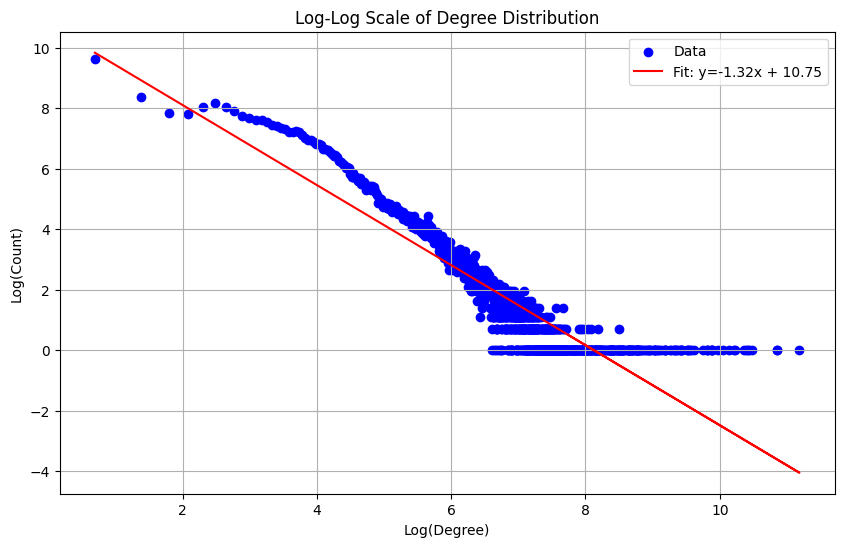

In [74]:
import networkx as nx  
import cudf  
import cugraph  
import numpy as np  
import matplotlib.pyplot as plt  
from scipy.stats import linregress  

#Chuyển đổi các cạnh thành DataFrame cudf  
edges_list = list(G.edges())  
edges_df = cudf.DataFrame(edges_list, columns=['src', 'dst'])  

G_cu = cugraph.Graph()  
G_cu.from_cudf_edgelist(edges_df, source='src', destination='dst')  


degree_series = G_cu.degree()  

# Tính phân phối bậc  
degree_counts = degree_series['degree'].value_counts().reset_index()  
degree_counts.columns = ['degree', 'count']  

degree_counts = degree_counts.to_pandas()  

degree_counts['log_degree'] = np.log(degree_counts['degree'])  
degree_counts['log_count'] = np.log(degree_counts['count'])  

# Thực hiện hồi quy tuyến tính trên log-log  
slope, intercept, r_value, p_value, std_err = linregress(degree_counts['log_degree'], degree_counts['log_count'])  

alpha = -slope  
print(f"Estimated alpha for Power Law: {alpha}")  

plt.figure(figsize=(10, 6))  
plt.scatter(degree_counts['log_degree'], degree_counts['log_count'], color='blue', label='Data')  
plt.plot(degree_counts['log_degree'], intercept + slope * degree_counts['log_degree'], color='red', label='Fit: y={:.2f}x + {:.2f}'.format(slope, intercept))  
plt.title('Log-Log Scale of Degree Distribution')  
plt.xlabel('Log(Degree)')  
plt.ylabel('Log(Count)')  
plt.legend()  
plt.grid(True)  
plt.show()